In [1]:
pip install --upgrade pip setuptools wheel

In [1]:
!pip install numpy
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [8]:
df.replace('?', pd.NA, inplace=True)

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols]

In [ ]:
# numerical columns for scaling the data

In [12]:
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_numerical), columns=[f"{col}_std" for col in numerical_cols])

In [13]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_numerical), columns=[f"{col}_minmax" for col in numerical_cols])


In [14]:
df_scaled = pd.concat([df, df_standard_scaled, df_minmax_scaled], axis=1)

In [ ]:
'''
Scaling is important in machine learning to ensure that features contribute equally to the model.
Standard Scaling (z-score) is best used when data is normally distributed.
It is commonly used in models like logistic regression, knn and svm.
Min-Max Scaling, on the other hand, transforms features to fixed range (0 to 1)
and it is useful when data does not follow normal distribution.
'''

In [15]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [16]:
cat_cardinality = df[categorical_cols].nunique()
cat_cardinality

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2
native_country,42
income,2


In [ ]:
#counted the number of unique values in each column.

In [17]:
low_card_cols = cat_cardinality[cat_cardinality < 5].index.tolist()
low_card_cols

['sex', 'income']

In [ ]:
#categorical variables with less than 5 categories.

In [18]:
high_card_cols = cat_cardinality[cat_cardinality >= 5].index.tolist()
high_card_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [ ]:
#categorical variables with more than 5 categories.

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
# One-Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = pd.DataFrame(
    ohe.fit_transform(df[low_card_cols]),
    columns=ohe.get_feature_names_out(low_card_cols)
)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Label Encoding
label_encoded = df[high_card_cols].apply(lambda col: LabelEncoder().fit_transform(col))

In [23]:
df_non_cat = df.drop(columns=categorical_cols)

In [ ]:
# Drop original categorical columns

In [24]:
df_encoded = pd.concat([df_non_cat, onehot_encoded, label_encoded], axis=1)

In [ ]:
#combine all together

In [25]:
df_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country
0,39,77516,13,2174,0,40,1.0,0.0,7,9,4,1,1,4,39
1,50,83311,13,0,0,13,1.0,0.0,6,9,2,4,0,4,39
2,38,215646,9,0,0,40,1.0,0.0,4,11,0,6,1,4,39
3,53,234721,7,0,0,40,1.0,0.0,4,1,2,6,0,2,39
4,28,338409,13,0,0,40,0.0,0.0,4,9,2,10,5,2,5


In [ ]:
'''
One-Hot Encoding and Label Encoding are techniques used to convert categorical data into numerical format.
One-Hot Encoding creates a new binary column for each category, which is useful for low-cardinality features and avoids implying any order.
However, it can increase the dataset size significantly when there are many unique categories.
Label Encoding assigns a unique number to each category, making it efficient and memory-friendly, especially for high-cardinality columns.
But it can introduce a false sense of order between categories, which may mislead some models like linear regression.
Choosing between them depends on the number of unique values and the type of machine learning model used.

In [ ]:
#pros and cons of One-Hot Encoding and Label Encoding.
'''
One -Hot Encoding and Kabel Encoding are techniques used to convert categorical data into numerical format.
One-Hot Encoding create a new binary column for each category which is useful for low cardinality columns.
It can increase the dataset size significantly when there are many unique categories.

Label Encoding assigns a unique number to each category making it efficient and memory-friendly , especially for high cardinality columns.
But it can introduce false sense of order between categories, which may misleads some models like linear regression.
'''

In [26]:
def categorize_age(age):
    if age < 25:
        return 'young'
    elif age < 45:
        return 'middle_age'
    elif age < 65:
        return 'senior'
    else:
        return 'retired'

df['age_group'] = df['age'].apply(categorize_age)
df['age_group']

,age_group
0,middle_age
1,senior
2,middle_age
3,senior
4,middle_age
...,...
32556,middle_age
32557,middle_age
32558,senior
32559,young


In [27]:
df['capital_net'] = df['capital_gain'] - df['capital_loss']
df['capital_net']

,capital_net
0,2174
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [28]:
print(df[['capital_gain', 'capital_loss', 'fnlwgt']].skew())

capital_gain    11.953848
capital_loss     4.594629
fnlwgt           1.446980
dtype: float64


In [29]:
df['log_capital_gain'] = np.log1p(df['capital_gain'])

In [ ]:
'''
log transformation was applied to the capital gain column , as it was highly skewed.
log transformation reduces skewness, helping the model treat extreme values more effectively and improve prediction accuracy.
'''

In [30]:
from sklearn.ensemble import IsolationForest

In [31]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
# numerical columns for Isolation forest

In [32]:
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(numeric_df)

In [33]:
df['outlier'] = outliers

In [ ]:
#outliers

In [34]:
df_no_outliers = df[df['outlier'] == 1].drop(columns='outlier')

In [ ]:
#Removed outliers

In [1]:
!pip install ppscore

In [35]:
import ppscore as pps

In [36]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

In [37]:
# Filter only predictive power towards target (e.g., 'income')
pps_target = pps.predictors(df_no_outliers, 'income')
pps_target.sort_values(by='ppscore', ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capital_net,income,3.646783e-01,classification,True,weighted F1,0.663688,0.786334,DecisionTreeClassifier()
1,capital_gain,income,2.562133e-01,classification,True,weighted F1,0.663688,0.749855,DecisionTreeClassifier()
2,log_capital_gain,income,2.562133e-01,classification,True,weighted F1,0.663688,0.749855,DecisionTreeClassifier()
3,education,income,2.424772e-01,classification,True,weighted F1,0.663688,0.745236,DecisionTreeClassifier()
4,education_num,income,2.424772e-01,classification,True,weighted F1,0.663688,0.745236,DecisionTreeClassifier()
5,capital_loss,income,1.400074e-01,classification,True,weighted F1,0.663688,0.710774,DecisionTreeClassifier()
6,occupation,income,9.898125e-02,classification,True,weighted F1,0.663688,0.696976,DecisionTreeClassifier()
7,workclass,income,8.373847e-02,classification,True,weighted F1,0.663688,0.691850,DecisionTreeClassifier()
8,hours_per_week,income,3.060732e-02,classification,True,weighted F1,0.663688,0.673981,DecisionTreeClassifier()
9,age,income,1.263698e-02,classification,True,weighted F1,0.663688,0.667938,DecisionTreeClassifier()


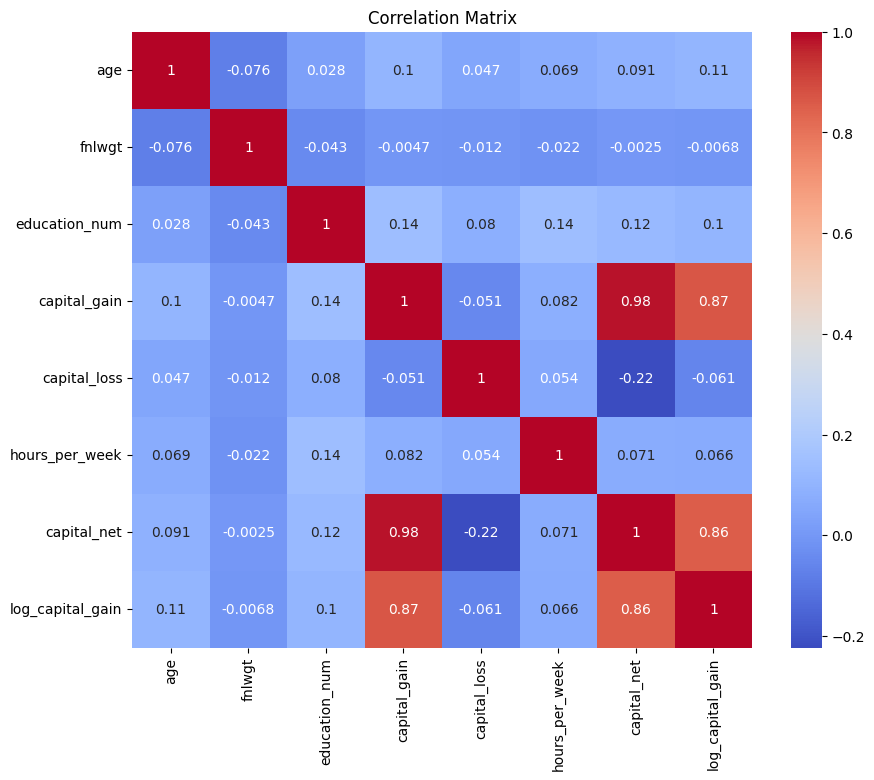

In [38]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
'''
Outliers were identified and removed using the Isolation Forest algorithm, which is effective for high-dimensional datasets.
Outliers can negatively affect model performance by skewing feature distributions,
distorting model coefficients, and leading to overfitting or poor generalization.
After outlier removal, the Predictive Power Score (PPS) was applied to measure how well each feature predicts the target variable.
correlation, which only captures linear relationships between numeric features,
PPS works for both numerical and categorical data and detects non-linear dependencies.
while the correlation matrix showed weak relationships between features like education_num and capital gain,
This shows that PPS offers a more comprehensive view of feature importance for predictive modeling.
'''